Import Dataset

In [1]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 159MB/s]


Import Libraries

In [2]:
# import cv2 as cv
# import glob
# import pickle


from tensorflow import keras
from keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

Explore the Dataset

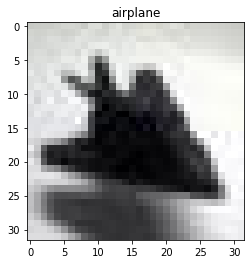

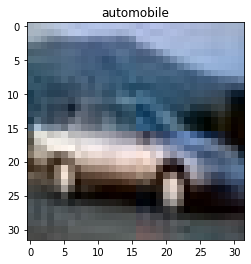

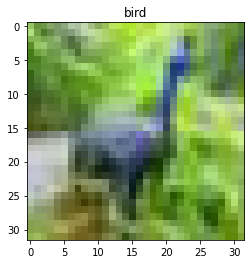

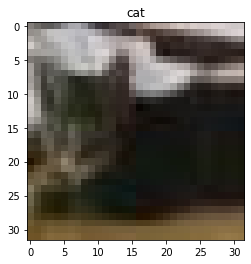

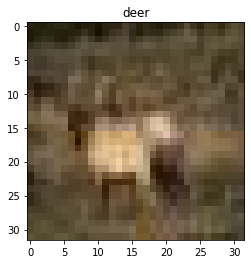

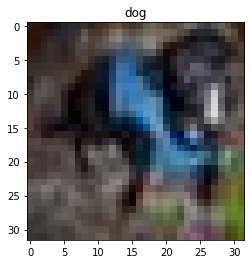

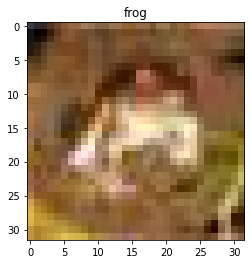

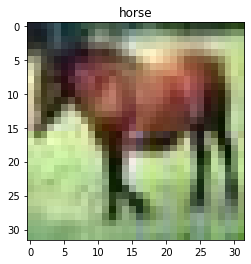

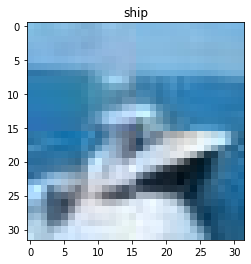

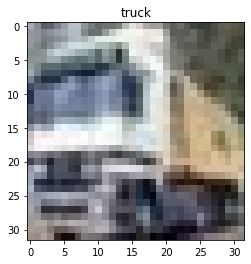

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for cn in class_names:
  image = img.imread(f'/content/CIFAR10/train/{cn}/0000.jpg')
  image_plot = plt.imshow(image)
  plt.title(cn)
  plt.show()

Loading the Dataset

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels_list, test_labels_list = [], []
train_labels_list += [[1, 0, 0, 0] for _ in range(5000)]
train_labels_list += [[0, 1, 0, 0] for _ in range(5000, 10000)]
train_labels_list += [[0, 0, 1, 0] for _ in range(10000, 15000)]
train_labels_list += [[0, 0, 0, 1] for _ in range(15000, 20000)]

test_labels_list += [[1, 0, 0, 0] for _ in range(1000)]
test_labels_list += [[0, 1, 0, 0] for _ in range(1000, 2000)]
test_labels_list += [[0, 0, 1, 0] for _ in range(2000, 3000)]
test_labels_list += [[0, 0, 0, 1] for _ in range(3000, 4000)]

# train_labels = [5000*[1, 0, 0, 0], 5000*[0, 1, 0, 0], 5000*[0, 0, 1, 0], 5000*[0, 0, 0, 1]]
# test_labels = [1000*[1, 0, 0, 0], 1000*[0, 1, 0, 0], 1000*[0, 0, 1, 0], 1000*[0, 0, 0, 1]]

train_labels, test_labels = np.array(train_labels_list), np.array(test_labels_list)
train_images, test_images = train_images[:20000], test_images[:4000]

In [13]:
print(type(train_images))
print(train_images.shape)

print(type(test_images))
print(test_images.shape)

print(type(train_labels))
print(train_labels.shape)

print(type(test_labels))
print(test_labels.shape)

<class 'numpy.ndarray'>
(20000, 32, 32, 3)
<class 'numpy.ndarray'>
(4000, 32, 32, 3)
<class 'numpy.ndarray'>
(20000, 4)
<class 'numpy.ndarray'>
(4000, 4)


بخش امتیازی

In [14]:
model = keras.Sequential([
                          
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [16]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=16, epochs=10, validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Changing Images RGB to Reduce Computational Complexity

In [18]:
def rgb2gray(rgb):
  r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

In [19]:
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

Text(0.5, 1.0, 'automobile')

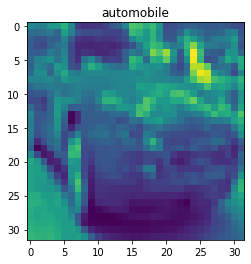

In [20]:
index = 5
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])

Flating Data

In [21]:
train_images = train_images.reshape(-1, 1024)
test_images = test_images.reshape(-1, 1024)

Shuffling Data

In [22]:
from sklearn.utils import shuffle

def shuffle_dataset(images, labels):
  idx = np.random.permutation(len(images))
  return images[idx], labels[idx]

In [23]:
train_images, train_labels = shuffle_dataset(train_images, train_labels)
test_images, test_labels = shuffle_dataset(test_images, test_labels)

In [24]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(20000, 1024)
(20000, 4)
(4000, 1024)
(4000, 4)


Feed Forward

In [25]:
w1 = np.random.normal(size=(16, 1024))
w2 = np.random.normal(size=(16, 16))
w3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

def sigmoid(w, data, b):
    return 1 / (1 + pow(np.e, -(w @ data + b)))

In [26]:
counter = 0
for i in range (200):
    a0 = train_images[i].reshape(-1,1)
    a1 = sigmoid(w1, a0, b1)
    a2 = sigmoid(w2, a1, b2)
    a3 = sigmoid(w3, a2, b3)

    output = np.argmax(a3)
    label = np.argmax(train_labels[i], axis=0)

    if(output == label):counter+=1

print('Accuracy: ', counter/200)

Accuracy:  0.225


Back Propagation

In [27]:
def BP_sigmoid(x):
    return 1 / (1 + np.exp(-x))

train_set = []
test_set = []
total_cost = []

epoches = 10
batch_size = 16
learning_rate = 0.3

for i in range(train_labels.T.shape[1]):
  train_set.append((train_images.T[:, i].reshape(1024, 1), train_labels.T[:, i].reshape(4, 1)))
for i in range(test_labels.T.shape[1]):
  test_set.append((test_images[i, :].T.reshape(1024, 1), test_labels[i, :].T.reshape(4, 1)))

In [28]:
for epoch in range(epoches):
    batches = [train_set[x:x+16] for x in range(0, 200, batch_size)]
    for batch in batches:
      grad_w1 = np.zeros((16, 1024))
      grad_w2 = np.zeros((16, 16))
      grad_w3 = np.zeros((4, 16))

      grad_b1 = np.zeros((16, 1))
      grad_b2 = np.zeros((16, 1))
      grad_b3 = np.zeros((4, 1))
        
      for image, label in batch:
        # sig0 = image
        a1 = BP_sigmoid(w1 @ image + b1)
        a2 = BP_sigmoid(w2 @ a1 + b2)
        a3 = BP_sigmoid(w3 @ a2 + b3)
            
        # last layer w
        for j in range(grad_w3.shape[0]):
          for k in range(grad_w3.shape[1]):
            grad_w3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
        # bias
        for j in range(grad_b3.shape[0]):
          grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
        # layer 3 activation
        delta_3 = np.zeros((16, 1))
        for k in range(16):
          for j in range(4):
            delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * w3[j, k]

        # w
        for k in range(grad_w2.shape[0]):
          for m in range(grad_w2.shape[1]):
            grad_w2[k, m] += delta_3[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
        # bias
        for k in range(grad_b2.shape[0]):
          grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
        # layer 2 activation 
        delta_2 = np.zeros((16, 1))
        for m in range(16):
          for k in range(16):
            delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * w2[k, m]
            
        # w
        for m in range(grad_w1.shape[0]):
          for v in range(grad_w1.shape[1]):
            grad_w1[m, v] += delta_2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * image[v, 0]
        
        # bias
        for m in range(grad_b1.shape[0]):
          grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
      w3 = w3 - (learning_rate * (grad_w3 / batch_size))
      w2 = w2 - (learning_rate * (grad_w2 / batch_size))
      w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        
      b3 = b3 - (learning_rate * (grad_b3 / batch_size))
      b2 = b2 - (learning_rate * (grad_b2 / batch_size))
      b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:200]:
      a0 = train_data[0]
      a1 = BP_sigmoid(w1 @ a0 + b1)
      a2 = BP_sigmoid(w2 @ a1 + b2)
      a3 = BP_sigmoid(w3 @ a2 + b3)

      for j in range(4):
        cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 200
    total_cost.append(cost) 

Accuracy: 0.285


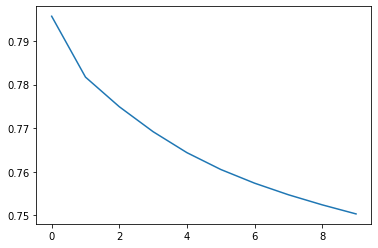

In [29]:
epoch_size = [x for x in range(epoches)]
plt.plot(epoch_size, total_cost)
number_of_correct_estimations = 0
for train_images in train_set[:200]:
  a0 = train_images[0]
  a1 = BP_sigmoid(w1 @ a0 + b1)
  a2 = BP_sigmoid(w2 @ a1 + b2)
  a3 = BP_sigmoid(w3 @ a2 + b3)
    
  predicted_number = np.where(a3 == np.amax(a3))
  real_number = np.where(train_images[1] == np.amax(train_images[1]))
    
  if predicted_number == real_number:
    number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / 200}")

Vectorization

In [33]:
from datetime import datetime

w1 = np.random.normal(size=(16,1024))
w2 = np.random.normal(size=(16, 16))
w3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_cost = []
epochs_num = 20

In [34]:
start = datetime.now()

for epoch in range(10):
    batches = [train_set[x:x+batch_size] for x in range(0, 200, batch_size)]
    for batch in batches:
    
        grad_w1 = np.zeros((16, 1024))
        grad_w2 = np.zeros((16, 16))
        grad_w3 = np.zeros((4, 16))
     
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # a0 = image
            a1 = BP_sigmoid(w1 @ image + b1)
            a2 = BP_sigmoid(w2 @ a1 + b2)
            a3 = BP_sigmoid(w3 @ a2 + b3)
            
            # last layer w
            grad_w3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # layer 3 activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(w3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # weight
            grad_w2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # layer 2 activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(w2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_w1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
      # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:200]:
        a0 = train_data[0]
        a1 = BP_sigmoid(w1 @ a0 + b1)
        a2 = BP_sigmoid(w2 @ a1 + b2)
        a3 = BP_sigmoid(w3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 200
    total_cost.append(cost)

# get the finish time
end = datetime.now()  

Accuracy:  0.35
Duration time:  0:00:00.713502


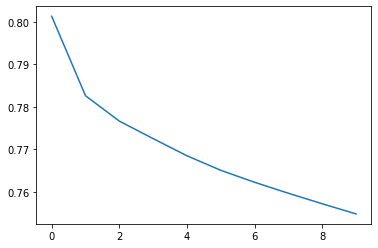

In [35]:
epoch_size = [x for x in range(10)]
plt.plot(epoch_size, total_cost)
number_of_correct_estimations = 0
for train_data in train_set[:200]:
    a0 = train_data[0]
    a1 = BP_sigmoid(w1 @ a0 + b1)
    a2 = BP_sigmoid(w2 @ a1 + b2)
    a3 = BP_sigmoid(w3 @ a2 + b3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted == real:
        number_of_correct_estimations += 1
        
print('Accuracy: ', number_of_correct_estimations/200 )
print("Duration time: ", end-start)


Model Testing

In [36]:
batch_size = 16
learning_rate = 0.3
epochs_num = 40

def train_sigmoid(x):
  return 1 / (1 +pow(np.e, -x))

In [44]:
total_costs = []

w1 = np.random.normal(size=(16, 1024))
w2 = np.random.normal(size=(16, 16))
w3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

for epoch in range(epochs_num):
    np.random.shuffle(train_set)
    batches = [train_set[x:x+batch_size] for x in range(0, 8000, batch_size)] #8000 len(train_set)
    for batch in batches:
        
        grad_w1 = np.zeros((16, 1024))
        grad_w2 = np.zeros((16, 16))
        grad_w3 = np.zeros((4, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # a0 = image
            a1 = train_sigmoid(w1 @ image + b1)
            a2 = train_sigmoid(w2 @ a1 + b2)
            a3 = train_sigmoid(w3 @ a2 + b3)
            
            # last layer w
            grad_w3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # layer 3 activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(w3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # weight
            grad_w2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # layer 2 activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(w2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_w1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        w3 = w3 - (learning_rate * (grad_w3 / batch_size))
        w2 = w2 - (learning_rate * (grad_w2 / batch_size))
        w1 = w1 - (learning_rate * (grad_w1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in train_set:
        a0 = train_data[0]
        a1 = train_sigmoid(w1 @ a0 + b1)
        a2 = train_sigmoid(w2 @ a1 + b2)
        a3 = train_sigmoid(w3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 8000
    total_costs.append(cost)    

Accuracy: 0.125125


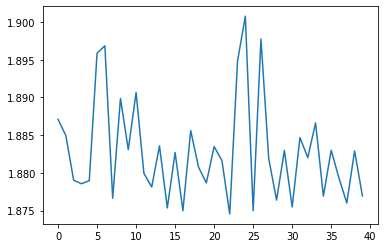

In [48]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, total_costs)
number_of_correct_estimations = 0
for test_data in test_set:
    a0 = test_data[0]
    a1 = train_sigmoid(w1 @ a0 + b1)
    a2 = train_sigmoid(w2 @ a1 + b2)
    a3 = train_sigmoid(w3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / 8000}")